In [1]:
import pandas as pd

In [2]:
sad = pd.read_csv("../../Data/ballad_sad.csv")
sad2 = pd.read_csv("../../Data/ballad_sad2.csv")

In [3]:
sad40 = pd.concat([sad,sad2])

In [4]:
sad40.발매일 = pd.to_datetime(sad40.발매일)

In [5]:
sad40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 39
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   가수명     70 non-null     object        
 1   노래제목    70 non-null     object        
 2   발매일     70 non-null     datetime64[ns]
 3   가사      70 non-null     object        
 4   좋아요수    70 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.3+ KB


In [6]:
import numpy as np

In [7]:
sad40['감정'] = pd.DataFrame(np.repeat("슬픔",40))

In [8]:
sad40

,가수명,노래제목,발매일,가사,좋아요수,감정
0,V.O.S,잘 살고 있다,2019-12-02,한잔 술에 잊자 그만 나도 숨 좀 쉬자 제발 마치 주문처럼 매일 읊조렸던 넌 모르는...,38512,슬픔
1,주보라,네가 없다 (Without You),2013-02-19,서툰 작별이었는지 아련한 슬픔 속에 눈물이 멈추질 않아 너무나 어렸던 걸까 내 이기...,2948,슬픔
2,헤이즈 (Heize),비가 오는 날엔 (2021),2021-08-04,세상이 어두워지고 조용히 비가 내리면 여전히 그대로 오늘도 어김없이 난 벗어나질 못...,73229,슬픔
3,정키,부담이 돼 (Feat. 휘인 Of 마마무),2017-03-08,더는 할 말이 없어 다른 이유도 어떤 변명도 난 의미 없단 걸 알아 끝이란 게 다 ...,134029,슬픔
4,나비 (Navi),잘 된 일이야,2011-01-19,Hello Hello Hello Hello Hello Don't cry Don't ...,42209,슬픔
...,...,...,...,...,...,...
35,아이유,느리게 하는 일,2010-12-09,느리게 느리게 느리게 그대를 잊으려 해요 빠르게 빠르게 가는 시간보다 더 천천히 잊...,48843,슬픔
36,김나영,가끔 내가,2014-06-27,무슨 말이라도 좀 해봐 잘못 나온 말이 였다고 헤어지잔 너의 그 말에 털석 주저 앉...,49080,슬픔
37,정키,니가 내 곁에 머물렀던 시간 (Feat. 육성재 of BTOB),2018-12-05,무슨 말이든 해 봐 울고만 있지 말고 또 짓궂은 장난이라고 자주 다퉜긴 해도 요즘 ...,27570,슬픔
38,김나영,그래 그래,2016-10-18,그래 그래 헤어지자 그래 우리 헤어지자 내 사랑이 니 마음에 들지 않다면 그래 그래...,17025,슬픔


In [9]:
import re
import numpy as np
from konlpy.tag import Okt
from sklearn import preprocessing
import tensorflow

In [10]:
list(sad40.가사[1])

['서툰 작별이었는지 아련한 슬픔 속에 눈물이 멈추질 않아 너무나 어렸던 걸까 내 이기적임에 너를 보내고 말았던 걸까 우리 헤어지자고 말한지 딱 하루 뒤 잠깐의 실수였단 걸 뒤늦게 깨달아버린 순간 아침마다 듣던 네 목소리 따스한 네 품이 벌써 그리운 내가 싫어져 바보처럼 너를 버린 내가 왜 이제와서 눈물을 흘리는지 내 마음을 알 수 없는게 더 아파 서툰 사랑이었을까 나 항상 너에게 없는 사람처럼 느껴질때가 많았어 우리 헤어지자고 말한지 딱 하루 뒤 잠깐의 실수였단 걸 뒤늦게 깨달아버린 순간 아침마다 듣던 네 목소리 따스한 네 품이 벌써 그리운 내가 싫어져 바보처럼 너를 버린 내가 왜 이제와서 눈물을 흘리는지 내 마음을 알 수 없는게 더 아파 이미 뱉어버린 작별인사 안에서 우리 사랑했던 그 기억들만 아침마다 듣던 네 목소린 이제 어제처럼 오늘도 나에게 널 사랑한다 할 것만 같은데 들리지 않아 바보처럼 너를 버린 내가 왜 이제와서 눈물을 흘리는걸까 내 마음을 알 수 없는게 더 아파 ',
 '다 핀 어느 이름 모를 꽃 한송이의 떠나기 전의 끝모습처럼 하필 모든 것이 너무 눈부셨던 날 우리 얘기도 끝나버렸어 오후를 막 지난 저녁이 자주 깜박이는 저 별이 다 그날부터 너를 닮아 슬퍼 보였어 맨 처음 너를 만나 잠못이룬 그많은 나의 밤들과 널 알아가면서 더 눈부시게 피었던 모든 아침들 널 좋아했던 만큼 아파야만 하는게 이별이래도 아마도난 또 사랑일걸 너를 다시 한번 보게 된 다면 다 쓴 누가 버리고 간 침대를 보며 그 안에 담긴 꿈을 세 본다 때로는 간절한 기다림 때로는 뜻모를 서러움 꼭 남겨졌던 나같아서 눈물이 났어 맨 처음 너를 만나 잠못이룬 그많은 나의 밤들과 널 알아가면서 더 눈부시게 피었던 모든 아침들 널 좋아했던 만큼 아파야만 하는게 이별이래도 아마도 난 또 사랑일걸 너를 다시 한번 보게 된 다면 아픈 기억은 다 지울래 나는 겁을 먹긴 싫은데 자꾸 움츠린 채 걷기 싫은데 겨울이 가고 봄이 오고 그런 것처럼 또 아프게 나 피어난다면 난 태어나서 처음 해를 보는 

In [11]:
lyrics_text = re.sub("[^가-힇ㄱ-ㅎㅏ-ㅣ\\s]","",str(list(sad40['가사'][0])))
print(lyrics_text)

한잔 술에 잊자 그만 나도 숨 좀 쉬자 제발 마치 주문처럼 매일 읊조렸던 넌 모르는 내 슬픈 혼잣말 친구들 통해 들은 네 소식 너무 잘 살고 있어 날 만날 때보다 더 너는 없었지만 억지로 삼킨 밥들이 친구가 되어줬던 술이 겨우 날 숨 좀 쉬게 해 많이 잊었어 이제 네 얼굴도 까마득해 잘 살고 있다 너처럼 두려워 듣기 싫던 네 소식 막상 듣게 되니 또 이별한 듯이 아파 너는 없었지만 억지로 삼킨 밥들이 친구가 되어줬던 술이 겨우 날 숨 좀 쉬게 해 많이 잊었어 이제 네 얼굴도 까마득해 잘살고 있다 너처럼 너 없는 많은 밤들이 혼자 버틸 날들이 아직 너무 많은데 가끔은 너 철없던 나의 장난에 입꼬리 올라가던 그 미소가 그리워 가진 건 없지만 널 가진 게 전부였어 그래서 무너졌나 봐 너밖에 없었으니까 언젠간 나도 나만 사랑해줄 사람 만나 잘 살고 싶다 너처럼 나도 그럴 수 있을까  누구도 잘못한 건 없어 모르겠어 우린 최선을 다 했어 발버둥 쳐 사랑하기 위해  사실은 다 알고 있었지   눈물도 소용없어요 우리는 여기까지야 이별이 이렇게 쉽네요 돌아서는 그 순간 남 사라지는 우리라는 말 사라지는 우리라는 말 사라지는 우리란 말 사라지는 우리 지워지는 우리 현실은 동화를 질투해 절대 쉽게 우릴 가만두지 않아 버틸 만큼 버틴 것 같은데 세상의 끝 한 걸음 앞에 우리를 기다리네 눈물도 소용없어요 우리는 여기까지야 이별이 이렇게 쉽네요 돌아서는 그 순간 남 사라지는 우리라는 말 아득한 네 체온 아득한 입맞춤 너는 꿈처럼 가네 기억 속으로 숨네 눈물도 소용없어요 우리는 여기까지야 사라지는 우리라는 말 사라지는 우리란 말 사라지는 우리 지워지는 우리 


In [12]:
okt = Okt()
lyrics_text1 = okt.morphs(lyrics_text,stem=True)
print(lyrics_text1)

['한잔', '술', '에', '잊다', '그만', '나다', '숨', '좀', '쉬다', '제발', '마치', '주문', '처럼', '매일', '읊조리다', '넌', '모르다', '내', '슬프다', '혼잣말', '친구', '들', '통해', '들다', '네', '소식', '너무', '자다', '살', '고', '있다', '날', '만날', '때', '보다', '더', '너', '는', '없다', '억지로', '삼키다', '밥', '들', '이', '친구', '가', '되어다', '주다', '술', '이', '겨우', '날', '숨', '좀', '쉬', '게', '해', '많이', '잊다', '이제', '네', '얼굴', '도', '까마득하다', '자다', '살', '고', '있다', '너', '처럼', '두렵다', '듣기', '싫다', '네', '소식', '막상', '듣다', '되다', '또', '이별', '한', '듯이', '아프다', '너', '는', '없다', '억지로', '삼키다', '밥', '들', '이', '친구', '가', '되어다', '주다', '술', '이', '겨우', '날', '숨', '좀', '쉬', '게', '해', '많이', '잊다', '이제', '네', '얼굴', '도', '까마득하다', '잘살다', '있다', '너', '처럼', '너', '없다', '많다', '밤', '들', '이', '혼자', '버티다', '날', '들', '이', '아직', '너무', '많다', '가끔', '은', '너', '철', '없다', '나', '의', '장난', '에', '입', '꼬리', '올라가다', '그', '미소', '가', '그립다', '가지다', '건', '없다', '널', '가지다', '게', '전부', '이다', '그래서', '무너지다', '보다', '너', '밖에', '없다', '언', '젠', '간', '나다', '나', '만', '사랑', '해주다', '사람', '만나다', '자다', '살', '고', '싶다', '너', '처럼'

In [13]:
stop_words = set(['에','처럼','들','살','때','더','는','다','살','고','이','은','의','에',\
    '그','건','게','의','이다','언','젠','간','만','알','도','란','를','라는','란','으로','것'])
clean_lyrics = [token for token in lyrics_text1 if not token in stop_words]
print(clean_lyrics)

['한잔', '술', '잊다', '그만', '나다', '숨', '좀', '쉬다', '제발', '마치', '주문', '매일', '읊조리다', '넌', '모르다', '내', '슬프다', '혼잣말', '친구', '통해', '들다', '네', '소식', '너무', '자다', '있다', '날', '만날', '보다', '너', '없다', '억지로', '삼키다', '밥', '친구', '가', '되어다', '주다', '술', '겨우', '날', '숨', '좀', '쉬', '해', '많이', '잊다', '이제', '네', '얼굴', '까마득하다', '자다', '있다', '너', '두렵다', '듣기', '싫다', '네', '소식', '막상', '듣다', '되다', '또', '이별', '한', '듯이', '아프다', '너', '없다', '억지로', '삼키다', '밥', '친구', '가', '되어다', '주다', '술', '겨우', '날', '숨', '좀', '쉬', '해', '많이', '잊다', '이제', '네', '얼굴', '까마득하다', '잘살다', '있다', '너', '너', '없다', '많다', '밤', '혼자', '버티다', '날', '아직', '너무', '많다', '가끔', '너', '철', '없다', '나', '장난', '입', '꼬리', '올라가다', '미소', '가', '그립다', '가지다', '없다', '널', '가지다', '전부', '그래서', '무너지다', '보다', '너', '밖에', '없다', '나다', '나', '사랑', '해주다', '사람', '만나다', '자다', '싶다', '너', '나다', '그렇다', '수', '있다', '누구', '잘못', '한', '없다', '모르다', '우린', '최선', '을', '하다', '발버둥', '치다', '사랑', '하다', '위해', '사실', '있다', '눈물', '소용없다', '우리', '여기', '까지야', '이별', '이렇게', '쉬다', '돌아서다', '순간', '남', '사라지다', '우리', '말'

In [14]:
def preprocessing(lyric,okt,remove_stopwords = False,stop_words=[]):
    lyrics_text = re.sub("[^가-힇ㄱ-ㅎㅏ-ㅣ\\s]","",lyric)
    lyrics_text1 = okt.morphs(lyrics_text,stem=True)
    if remove_stopwords:

        stop_words = set(['에','처럼','들','살','때','더','는','다','살','고','이','은','의','에',\
                    '그','건','게','의','이다','언','젠','간','만','알','도','란','를','라는','란','으로','것',\
                    '가','해','또','쉬','있다]','[서툴다','기','을','인','이기','잡','과','와','수'])
        clean_lyrics = [token for token in lyrics_text1 if not token in stop_words]
    return clean_lyrics

In [15]:
test = []
for lyric in sad40.가사:
    if type(lyric) == str:
        test.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        test.append([])

In [16]:
test

[['한잔',
  '술',
  '잊다',
  '그만',
  '나다',
  '숨',
  '좀',
  '쉬다',
  '제발',
  '마치',
  '주문',
  '매일',
  '읊조리다',
  '넌',
  '모르다',
  '내',
  '슬프다',
  '혼잣말',
  '친구',
  '통해',
  '들다',
  '네',
  '소식',
  '너무',
  '자다',
  '있다',
  '날',
  '만날',
  '보다',
  '너',
  '없다',
  '억지로',
  '삼키다',
  '밥',
  '친구',
  '되어다',
  '주다',
  '술',
  '겨우',
  '날',
  '숨',
  '좀',
  '많이',
  '잊다',
  '이제',
  '네',
  '얼굴',
  '까마득하다',
  '자다',
  '있다',
  '너',
  '두렵다',
  '듣기',
  '싫다',
  '네',
  '소식',
  '막상',
  '듣다',
  '되다',
  '이별',
  '한',
  '듯이',
  '아프다',
  '너',
  '없다',
  '억지로',
  '삼키다',
  '밥',
  '친구',
  '되어다',
  '주다',
  '술',
  '겨우',
  '날',
  '숨',
  '좀',
  '많이',
  '잊다',
  '이제',
  '네',
  '얼굴',
  '까마득하다',
  '잘살다',
  '있다',
  '너',
  '너',
  '없다',
  '많다',
  '밤',
  '혼자',
  '버티다',
  '날',
  '아직',
  '너무',
  '많다',
  '가끔',
  '너',
  '철',
  '없다',
  '나',
  '장난',
  '입',
  '꼬리',
  '올라가다',
  '미소',
  '그립다',
  '가지다',
  '없다',
  '널',
  '가지다',
  '전부',
  '그래서',
  '무너지다',
  '보다',
  '너',
  '밖에',
  '없다',
  '나다',
  '나',
  '사랑',
  '해주다',
  '사람',
  '만나다',
  '자다',
  '싶다',
  '너

In [17]:
import nltk

In [18]:
for i in test:
    ko = nltk.Text(i)
ko.vocab().most_common(100)

[('우리', 11),
 ('없다', 8),
 ('너', 6),
 ('밖에', 6),
 ('헤어지다', 4),
 ('보내다', 4),
 ('시간', 4),
 ('기억', 3),
 ('하다', 3),
 ('돌아서다', 3),
 ('떠나다', 3),
 ('있다', 3),
 ('사랑', 2),
 ('줄', 2),
 ('알다', 2),
 ('말', 2),
 ('못', 2),
 ('하고', 2),
 ('조차', 2),
 ('어떻다', 2),
 ('나', 2),
 ('쉬다', 2),
 ('꿈', 2),
 ('함께', 2),
 ('전부', 2),
 ('그렇다', 2),
 ('잊혀지다', 2),
 ('밤하늘', 1),
 ('속', 1),
 ('별처럼', 1),
 ('내', 1),
 ('눈부시다', 1),
 ('추억', 1),
 ('너무', 1),
 ('많다', 1),
 ('별빛', 1),
 ('같다', 1),
 ('영원하다', 1),
 ('우린', 1),
 ('오늘', 1),
 ('무너지다', 1),
 ('말다', 1),
 ('그만', 1),
 ('하자', 1),
 ('한마디', 1),
 ('눈', 1),
 ('감고', 1),
 ('빌다', 1),
 ('숨', 1),
 ('막히다', 1),
 ('아무', 1),
 ('수도', 1),
 ('없이', 1),
 ('오랜', 1),
 ('해오다', 1),
 ('이름', 1),
 ('모습', 1),
 ('흐르다', 1),
 ('모두', 1),
 ('지나다', 1),
 ('언젠가', 1),
 ('잊다', 1)]

In [19]:
len(test)

70

In [20]:
import matplotlib.pyplot as plt

In [21]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

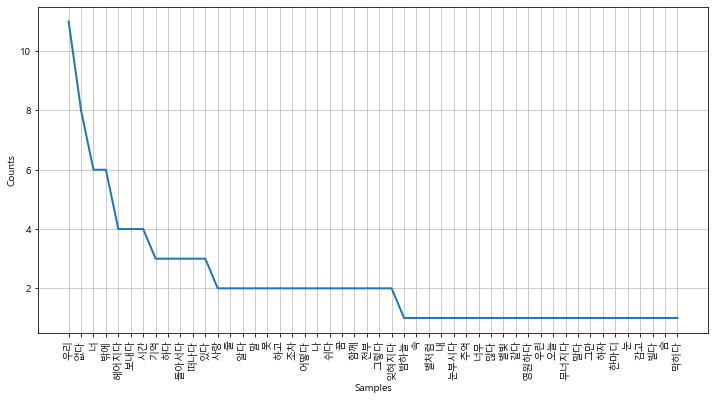

In [22]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [23]:
from wordcloud import WordCloud

In [24]:
# wordcloud로 그리기
data = ko.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data = dict(data)

wordcloud = WordCloud(
    background_color='White',
    colormap= 'gist_earth',
    # mask=cand_mask, # 워드클라우드 모양 설정
    font_path= 'c:/Windows/Fonts/malgun.ttf',
    relative_scaling= 0.4,
    # font_path="AppleGothic" 
).generate_from_frequencies(tmp_data)

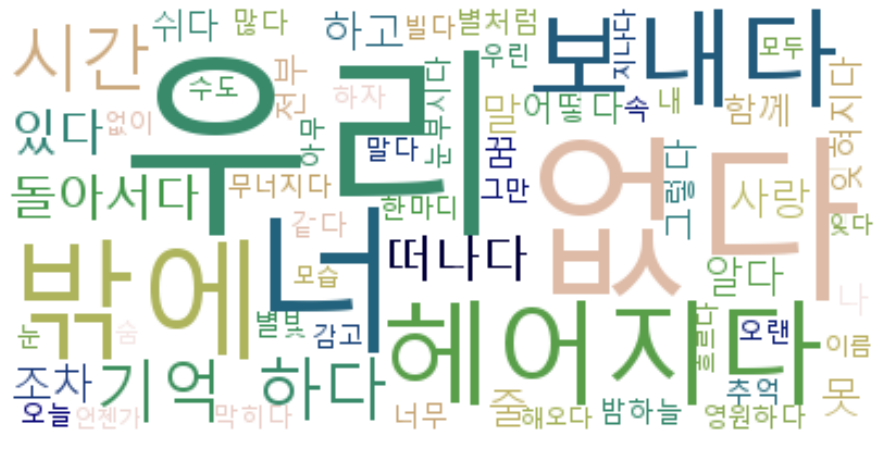

In [25]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
print("토큰 : \n",list(ko.vocab())," => 토큰 갯수 : ",len(list(ko.vocab())))

토큰 : 
 ['우리', '없다', '너', '밖에', '헤어지다', '보내다', '시간', '기억', '하다', '돌아서다', '떠나다', '있다', '사랑', '줄', '알다', '말', '못', '하고', '조차', '어떻다', '나', '쉬다', '꿈', '함께', '전부', '그렇다', '잊혀지다', '밤하늘', '속', '별처럼', '내', '눈부시다', '추억', '너무', '많다', '별빛', '같다', '영원하다', '우린', '오늘', '무너지다', '말다', '그만', '하자', '한마디', '눈', '감고', '빌다', '숨', '막히다', '아무', '수도', '없이', '오랜', '해오다', '이름', '모습', '흐르다', '모두', '지나다', '언젠가', '잊다']  => 토큰 갯수 :  62


In [27]:
token_sum = list(ko.vocab())

In [28]:
from tensorflow import keras

In [29]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = sad40['가사']
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if not word[1] in ["Josa","Eomi","Puntuation"]:
            if word[0] != "n":
                r.append(word[0])
    rl = (" ".join(r).strip())
    
    okt_result.append(rl)

In [30]:
okt_result[0]

'한잔 술 잊다 그만 나다 숨 좀 쉬다 제발 마치 주문 매일 읊조리다 넌 모르다 내 슬프다 혼잣말 친구 들 통해 들다 네 소식 너무 자다 살 있다 날 만날 때 더 너 없다 억지로 삼키다 밥 들 친구 되어다 주다 술 겨우 날 숨 좀 쉬 해 많이 잊다 이제 네 얼굴 까마득하다 자다 살 있다 너 두렵다 듣기 싫다 네 소식 막상 듣다 되다 또 이별 듯이 아프다 너 없다 억지로 삼키다 밥 들 친구 되어다 주다 술 겨우 날 숨 좀 쉬 해 많이 잊다 이제 네 얼굴 까마득하다 잘살다 있다 너 너 없다 많다 밤 들 혼자 버티다 날 들 아직 너무 많다 가끔 너 철 없다 나 장난 입 꼬리 올라가다 그 미소 그립다 가지다 건 없다 널 가지다 게 전부 이다 그래서 무너지다 보다 너 없다 언 젠 간 나다 나 사랑 해주다 사람 만나다 자다 살 싶다 너 나다 그렇다 수 있다'

In [31]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [32]:
print((encoded[0]))

[45, 0, 0, 0, 0, 62, 0, 0, 43, 0, 0, 21, 0, 0, 49, 0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 59, 0, 0, 0, 31, 0, 0, 0, 0, 0, 0, 0, 42, 0, 0, 0, 0, 0, 0, 0, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 41, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 34, 0, 53, 0, 0, 0, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0, 49, 0, 0, 0, 22, 0, 55, 0, 35, 56, 0, 62, 0, 0, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 34, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 56, 36, 0, 0, 56, 0, 51, 0, 0, 0, 34, 0, 53, 0, 0, 0, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0, 49, 0, 0, 0, 22, 0, 55, 0, 35, 56, 0, 62, 0, 0, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 0, 0, 0, 0, 0, 0, 12, 0, 0, 34, 0, 34, 0, 53, 0, 0, 35, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 0, 0, 34, 41, 0, 35, 0, 0, 0, 0, 0, 34, 0, 0, 0, 53, 0, 0, 21, 0, 

가사의 최대 길이 : 1038
가사의 최소 길이 : 246
가사의 평균 길이 : 478.285714


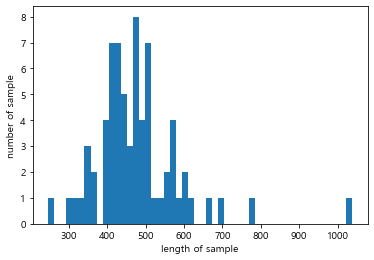

In [33]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [34]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[45,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [41,  0,  0, ...,  0,  0,  0],
       [43,  0,  0, ...,  0,  0,  0],
       [28, 44,  0, ...,  0,  0,  0]])

In [35]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

70 1038


In [36]:
categories = sad40['감정'].to_list()

def category_encoding(category):
    if category == '슬픔':
        return 0
    else:
        return 1

In [37]:
encoded_category = [category_encoding(category) for category in categories]
encoded_category[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
len(encoded_category)

70

---
## 기쁨

In [39]:
happy = pd.read_csv("../../Data/ballad_happy.csv")
happy.head()

,가수명,노래제목,발매일,가사,좋아요수
0,양다일,Darling,2020-11-23,Oh darling 처음 널 만나면 수줍은 대화들로 사랑에 빠질 거야 My darl...,10907
1,장범준,잠이 오질 않네요,2020-10-24,당신은 날 설레게 만들어 조용한 내 마음 자꾸만 춤추게 해 얼마나 얼마나 날 떨리게...,159018
2,산들,취기를 빌려 (취향저격 그녀 X 산들),2020-07-20,언제부턴가 불쑥 내 습관이 돼버린 너 혹시나 이런 맘이 어쩌면 부담일까 널 주저했어...,218069
3,ODD-CAT (오드캣),달밤 (Moon & Sweet),2020-07-02,작게 흐르는 음악 볼에 닿는 바람 달밤 달밤 달달한 밤 귓가에 들리는 길모퉁이 버스...,698
4,백아연,어디라도,2020-11-18,우연의 다른 이름은 운명이란 걸 배웠죠 우리 사랑의 끝이 없는 걸 이제서야 알았죠 ...,1622


In [40]:
len(happy)

35

In [41]:
happy['감정'] = pd.DataFrame(np.repeat("기쁨",35))

In [42]:
happy.tail()

,가수명,노래제목,발매일,가사,좋아요수,감정
30,멜로망스,선물,2017-07-10,빛이 들어오면 자연스레 뜨던 눈 그렇게 너의 눈빛을 보곤 사랑에 눈을 떴어 항상 알...,334594,기쁨
31,정준일,있잖아 널 사랑해,2016-12-29,따뜻한 봄바람처럼 상냥하게 내게 불어오던 너 찬란하게 피어나던 여름의 꽃처럼 반짝이...,25523,기쁨
32,멜로망스,사랑인가 봐,2022-02-18,너와 함께 하고 싶은 일들을 상상하는 게 요즘 내 일상이 되고 너의 즐거워하는 모습...,147178,기쁨
33,이하이,손을 잡아줘요,2021-11-14,내 맘을 깊이 들여다보면 작은 구멍이 하나 있어요 아무도 모르게 나조차도 모르게 자...,9458,기쁨
34,10CM,서랍,2021-12-07,어린 햇살 아래서 뛰어놀곤 했었던 가쁜 숨결 굽이진 골목 지나 길을 따라가보면 같은...,65760,기쁨


In [43]:
list(happy.가사[0])

['O',
 'h',
 ' ',
 'd',
 'a',
 'r',
 'l',
 'i',
 'n',
 'g',
 ' ',
 '처',
 '음',
 ' ',
 '널',
 ' ',
 '만',
 '나',
 '면',
 ' ',
 '수',
 '줍',
 '은',
 ' ',
 '대',
 '화',
 '들',
 '로',
 ' ',
 '사',
 '랑',
 '에',
 ' ',
 '빠',
 '질',
 ' ',
 '거',
 '야',
 ' ',
 'M',
 'y',
 ' ',
 'd',
 'a',
 'r',
 'l',
 'i',
 'n',
 'g',
 ' ',
 '아',
 '마',
 '도',
 ' ',
 '우',
 '린',
 ' ',
 '손',
 '을',
 ' ',
 '마',
 '주',
 ' ',
 '잡',
 '고',
 '서',
 ' ',
 '도',
 '시',
 '를',
 ' ',
 '거',
 '닐',
 ' ',
 '거',
 '야',
 ' ',
 '비',
 '라',
 '도',
 ' ',
 '오',
 '면',
 ' ',
 '골',
 '목',
 ' ',
 '어',
 '귀',
 '에',
 ' ',
 '발',
 '을',
 ' ',
 '멈',
 '추',
 '고',
 '서',
 ' ',
 '바',
 '라',
 '보',
 '다',
 '가',
 ' ',
 '입',
 '을',
 ' ',
 '맞',
 '출',
 '지',
 '도',
 ' ',
 '몰',
 '라',
 ' ',
 '어',
 '둠',
 '이',
 ' ',
 '오',
 '면',
 ' ',
 '밝',
 '게',
 ' ',
 '빛',
 '나',
 '는',
 ' ',
 '별',
 '빛',
 '들',
 ' ',
 '아',
 '래',
 '서',
 ' ',
 '음',
 '악',
 '에',
 ' ',
 '취',
 '해',
 ' ',
 '서',
 '로',
 '에',
 '게',
 ' ',
 '기',
 '대',
 '어',
 ' ',
 'D',
 'a',
 'r',
 'l',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'y',
 ' ',
 'd',
 'a'

In [44]:
# \n,\t... 허용하지 않음, 한글,띄어쓰기만 가능
lyrics_text_H = re.sub("[^가-힇ㄱ-ㅎㅏ-ㅣ+]","",str(list(happy['가사'][1])))
print(lyrics_text_H)

당신은날설레게만들어조용한내마음자꾸만춤추게해얼마나얼마나날떨리게하는지당신이이밤을항상잠못들게해매일같은밤너를생각하면서유치한노랠들으며심장이춤을추면서오오난너를기다리면서유치한노랠부르며심장이춤을추면서워나를떨리게하나요그대왜나를설레게하나요자꾸만오늘도잠못이루는이밤아름다운그대나를아프게하나요웃는그대왜자꾸설레게하나요하염없이오늘밤잠이오질않네요보고싶은그대여당신이날들게만들어갑자기내마음자꾸만멍들게해얼마나얼마나잠못들게하는지고요한내마음항상시끄럽게해매일같은밤너를생각하면서유치한노랠들으며심장이춤을추면서워난너를기다리면서유치한노랠부르며심장이춤을추면서워나를떨리게하나요그대왜나를설레게하나요자꾸만오늘도잠못이루는이밤아름다운그대나를아프게하나요웃는그대왜자꾸설레게하나요하염없이오늘밤잠이오질않네요보고싶은그대여매일밤너를생각하면서유치한노랠들으며심장이춤을추면서워오난너를기다리면서유치한노랠부르며심장이춤을추면서워나를떨리게하나요그대왜나를설레게하나요자꾸만오늘도잠못이루는이밤아름다운그대여나를아프게하나요웃는그대왜자꾸설레게하나요하염없이오늘밤잠이오질않네요보고싶은그대여


In [45]:
okt = Okt()
lyrics_text_H1 = okt.morphs(lyrics_text_H,stem=True)
print(lyrics_text_H1)

['당신', '은', '날', '설레다', '만들다', '조용하다', '마음', '자꾸만', '춤추다', '얼마나', '얼마나', '날', '떨리다', '하다', '당신', '이이', '밤', '을', '항상', '자다', '들다', '해', '매일', '같다', '밤너', '를', '생각', '하', '면서', '유치하다', '노랗다', '들다', '심장', '이', '춤', '을', '추다', '오오', '난', '너', '를', '기다리다', '유치하다', '노랗다', '부르다', '심장', '이', '춤', '을', '추다', '워', '나르다', '떨리다', '하나요', '그대', '왜', '나르다', '설레다', '자꾸만', '오늘', '도잠', '못', '이루다', '밤', '아름답다', '그대', '나르다', '아프다', '하나요', '웃다', '그대', '왜', '자꾸', '설레다', '하염없이', '오늘', '밤잠', '이', '오다', '않다', '보고', '싶다', '그', '대여', '당신', '이', '날', '들', '게', '만들다', '갑자기', '내', '마음', '자꾸만', '멍', '들', '게', '해', '얼마나', '얼마나', '잠못', '들', '게', '하다', '요한', '내', '마음', '항상', '시끄럽다', '해', '매일', '같다', '밤너', '를', '생각', '하', '면서', '유치하다', '노랗다', '들다', '심장', '이', '춤', '을', '추다', '워', '난', '너', '를', '기다리다', '유치하다', '노랗다', '부르다', '심장', '이', '춤', '을', '추다', '워', '나르다', '떨리다', '하나요', '그대', '왜', '나르다', '설레다', '자꾸만', '오늘', '도잠', '못', '이루다', '밤', '아름답다', '그대', '나르다', '아프다', '하나요', '웃다', '그대', '왜', '자꾸', '설레다', '하염없이', '오늘', '밤잠',

In [46]:
stop_words_H = set(['은','이이','을','해','밤너','를','하','이','을','들','게','뭐','왜','매','그','대여','도잠','하','면서',\
                '면서','멍','매','일밤','워'])
clean_lyrics_H = [token for token in lyrics_text_H1 if not token in stop_words_H]
print(clean_lyrics_H)

['당신', '날', '설레다', '만들다', '조용하다', '마음', '자꾸만', '춤추다', '얼마나', '얼마나', '날', '떨리다', '하다', '당신', '밤', '항상', '자다', '들다', '매일', '같다', '생각', '유치하다', '노랗다', '들다', '심장', '춤', '추다', '오오', '난', '너', '기다리다', '유치하다', '노랗다', '부르다', '심장', '춤', '추다', '나르다', '떨리다', '하나요', '그대', '나르다', '설레다', '자꾸만', '오늘', '못', '이루다', '밤', '아름답다', '그대', '나르다', '아프다', '하나요', '웃다', '그대', '자꾸', '설레다', '하염없이', '오늘', '밤잠', '오다', '않다', '보고', '싶다', '당신', '날', '만들다', '갑자기', '내', '마음', '자꾸만', '얼마나', '얼마나', '잠못', '하다', '요한', '내', '마음', '항상', '시끄럽다', '매일', '같다', '생각', '유치하다', '노랗다', '들다', '심장', '춤', '추다', '난', '너', '기다리다', '유치하다', '노랗다', '부르다', '심장', '춤', '추다', '나르다', '떨리다', '하나요', '그대', '나르다', '설레다', '자꾸만', '오늘', '못', '이루다', '밤', '아름답다', '그대', '나르다', '아프다', '하나요', '웃다', '그대', '자꾸', '설레다', '하염없이', '오늘', '밤잠', '오다', '않다', '보고', '싶다', '너', '생각', '유치하다', '노랗다', '들다', '심장', '춤', '추다', '오난', '너', '기다리다', '유치하다', '노랗다', '부르다', '심장', '춤', '추다', '나르다', '떨리다', '하나요', '그대', '나르다', '설레다', '자꾸만', '오늘', '못', '이루다', '밤', '아름답다', '나르다', '아프다', '하나

In [47]:
def preprocessing_H(lyric,okt,remove_stopwords = False,stop_words=[]):
    lyrics_text_H = re.sub("[^가-힇ㄱ-ㅎㅏ-ㅣ+]","",lyric)
    lyrics_text_H1 = okt.morphs(lyrics_text_H,stem=True)
    if remove_stopwords:

        stop_words_H = set(['은','이이','을','해','밤너','를','하','이','을','들','게','뭐','왜','매','그','대여','도잠','하','면서',\
                '면서','멍','매','일밤','워','로','서','롤','든'])
        clean_lyrics_H = [token for token in lyrics_text_H1 if not token in stop_words_H]
    return clean_lyrics_H

In [48]:
test_H = []
for lyric in happy.가사:
    if type(lyric) == str:
        test_H.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        test_H.append([])

In [49]:
test_H

[['처음',
  '널',
  '만나다',
  '수줍다',
  '대화',
  '로',
  '사랑',
  '빠지다',
  '거야',
  '아마도',
  '우린',
  '손',
  '마주',
  '잡고',
  '서',
  '도시',
  '거닐다',
  '거야',
  '비',
  '라도',
  '오다',
  '골목',
  '어귀',
  '발',
  '멈추다',
  '바라보다',
  '입',
  '맞추다',
  '모르다',
  '어둠',
  '오다',
  '밝다',
  '빛나다',
  '별빛',
  '아래',
  '서',
  '음악',
  '취해',
  '서로',
  '에게',
  '기대다',
  '멈추다',
  '버리다',
  '시간',
  '속',
  '에서',
  '우리',
  '둘이서',
  '영원',
  '토록',
  '함께',
  '하다',
  '거야',
  '너',
  '곁',
  '에서',
  '눈',
  '감',
  '까지',
  '잊다',
  '못',
  '하다',
  '거야',
  '서로',
  '품',
  '안고',
  '온기',
  '느끼다',
  '날',
  '따스하다',
  '거야',
  '함께',
  '잠',
  '들다',
  '면',
  '비추다',
  '햇살',
  '가끔',
  '씩',
  '우린',
  '아쉽다',
  '거야',
  '다른',
  '모습',
  '말',
  '멈추다',
  '어색하다',
  '침묵',
  '오다',
  '면',
  '서운하다',
  '마음',
  '다투다',
  '보다',
  '오직',
  '둘',
  '알다',
  '그렇다',
  '말',
  '로',
  '가볍다',
  '미소',
  '되다',
  '거야',
  '멈추다',
  '버리다',
  '시간',
  '속',
  '에서',
  '우리',
  '둘이서',
  '영원',
  '토록',
  '함께',
  '하다',
  '거야',
  '너',
  '곁',
  '에서',
  '눈',
  '감',
  '까지',
  '널',
  '처음',
  '마주',

In [50]:
for i in test_H:
    ko_H = nltk.Text(i)
ko_H.vocab().most_common(100)

[('서', 5),
 ('하다', 5),
 ('기억', 4),
 ('난', 4),
 ('두', 4),
 ('눈', 4),
 ('보다', 3),
 ('낡아지다', 3),
 ('서랍', 3),
 ('속', 3),
 ('에서', 3),
 ('작다', 3),
 ('롤', 3),
 ('떠오르다', 3),
 ('아직도', 3),
 ('반짝', 3),
 ('이던', 3),
 ('네', 3),
 ('시간', 2),
 ('많다', 2),
 ('여기다', 2),
 ('우리', 2),
 ('마주', 2),
 ('널', 2),
 ('어리다', 1),
 ('햇살', 1),
 ('아래', 1),
 ('뛰어놀다', 1),
 ('가쁜', 1),
 ('숨결', 1),
 ('굽', 1),
 ('이진', 1),
 ('골목', 1),
 ('지나', 1),
 ('길', 1),
 ('따라가다', 1),
 ('같다', 1),
 ('어른', 1),
 ('이란', 1),
 ('아직', 1),
 ('어색하다', 1),
 ('나르다', 1),
 ('채우다', 1),
 ('변하다', 1),
 ('그대로', 1),
 ('인걸', 1),
 ('땀', 1),
 ('젖다', 1),
 ('놀다', 1),
 ('너', 1),
 ('돌아가다', 1),
 ('순', 1),
 ('없다', 1),
 ('그림자', 1),
 ('여기', 1),
 ('언제나', 1),
 ('날', 1),
 ('울리다', 1),
 ('존재', 1),
 ('지만', 1),
 ('놓다', 1),
 ('못', 1),
 ('지나다', 1),
 ('땐', 1),
 ('하나', 1),
 ('그땐', 1),
 ('우린', 1),
 ('어딜', 1),
 ('끄다', 1),
 ('혼자', 1),
 ('숨기다', 1),
 ('향', 1),
 ('한', 1),
 ('마음', 1),
 ('하진', 1),
 ('않다', 1),
 ('거야', 1),
 ('볼', 1),
 ('있다', 1),
 ('걸', 1),
 ('로', 1),
 ('충분하다', 1),
 ('담다', 1),

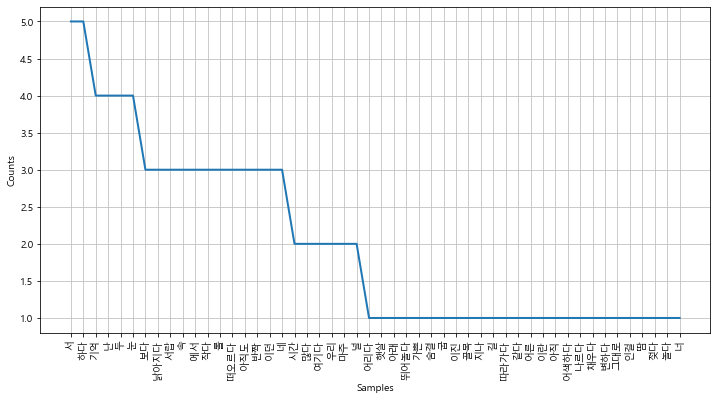

In [51]:
plt.figure(figsize=(12,6))
ko_H.plot(50)
plt.show()

In [52]:
# wordcloud로 그리기
data_H = ko.vocab().most_common(100)

# 딕셔너리로 만들기
tmp_data_H = dict(data_H)

wordcloud = WordCloud(
    background_color='White',
    colormap= 'gist_earth',
    # mask=cand_mask, # 워드클라우드 모양 설정
    font_path= 'c:/Windows/Fonts/malgun.ttf',
    relative_scaling= 0.4,
    # font_path="AppleGothic" 
).generate_from_frequencies(tmp_data_H)

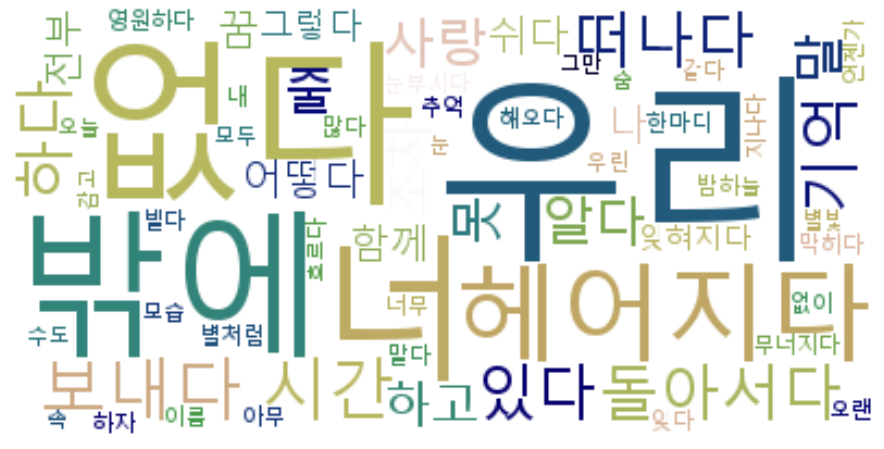

In [53]:
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
print("토큰 : \n",list(ko_H.vocab())," => 토큰 갯수 : ",len(list(ko_H.vocab())))

토큰 : 
 ['서', '하다', '기억', '난', '두', '눈', '보다', '낡아지다', '서랍', '속', '에서', '작다', '롤', '떠오르다', '아직도', '반짝', '이던', '네', '시간', '많다', '여기다', '우리', '마주', '널', '어리다', '햇살', '아래', '뛰어놀다', '가쁜', '숨결', '굽', '이진', '골목', '지나', '길', '따라가다', '같다', '어른', '이란', '아직', '어색하다', '나르다', '채우다', '변하다', '그대로', '인걸', '땀', '젖다', '놀다', '너', '돌아가다', '순', '없다', '그림자', '여기', '언제나', '날', '울리다', '존재', '지만', '놓다', '못', '지나다', '땐', '하나', '그땐', '우린', '어딜', '끄다', '혼자', '숨기다', '향', '한', '마음', '하진', '않다', '거야', '볼', '있다', '걸', '로', '충분하다', '담다', '언제', '든', '항상']  => 토큰 갯수 :  86


In [55]:
token_sum_H = list(ko_H.vocab())

In [56]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result_H = []
lines = happy['가사']
for line in lines:
    # 형태소 분석하기
    train_malist_H = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist_H:
        if not word[1] in ["Josa","Eomi","Puntuation"]:
            if word[0] != "n":
                r.append(word[0])
    rl_H = (" ".join(r).strip())
    
    okt_result_H.append(rl_H)

In [57]:
okt_result_H[0]

'Oh darling 처음 널 만나다 수줍다 대화 들 사랑 빠지다 My darling 아마도 우린 손 마주 잡고 도시 거닐다 비 오다 골목 어귀 발 멈추다 바라보다 입 맞추다 모르다 어둠 오다 밝다 빛나다 별빛 들 아래 음악 취해 서로 기대다 Darling My darling 멈추다 버리다 시간 속 우리 둘이서 영원 Darling My darling 함께 하다 너 곁 눈 감 때 Oh darling 잊다 못 하다 서로 품 안고 온기 느끼다 날 My darling 따스하다 함께 잠 들다 때 비추다 햇살 들 가끔 씩 우린 아쉽다 다른 모습 들 말 멈추다 어색하다 침묵 오다 때 서운하다 마음 다투다 보다 오직 둘 알다 그렇다 말 들 가볍다 미소 되다 Darling My darling 멈추다 버리다 시간 속 우리 둘이서 영원 Darling My darling 함께 하다 너 곁 눈 감 때 널 처음 마주 순간 알 수 있다 나르다 보다 지다 그 미소 그게 내 전 부란 걸 Darling My darling 설레다 내 마음 담다 너 고백 하다 영원 Darling My darling 나르다 안다 너 곁 눈 감 때 눈 감 때 눈 감 때'

> okt_result와 okt_result_H를 합쳐 encoding작업을 진행하는 것이 나음 

> 또한 token_sum와 token_sum_H를 합쳐야 함

In [83]:
token_test_sum = token_sum + token_sum_H

In [84]:
okt_test_result = okt_result + okt_result_H

In [85]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index_test = {word[0] : index + 1 for index, word in enumerate(token_test_sum)}
word_to_index_test['pad'] = 0 # 패딩용 인덱스 0
word_to_index_test['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded_test = []
for line in okt_test_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp_test = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp_test.append(word_to_index_test[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp_test.append(word_to_index_test['unk']) # unk의 인덱스로 변환

    encoded_test.append(temp_test)

가사의 최대 길이 : 1199
가사의 최소 길이 : 246
가사의 평균 길이 : 491.980952


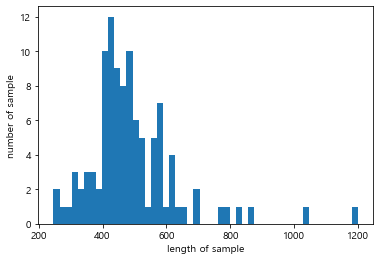

In [86]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length_test = max(len(l) for l in encoded_test)
print('가사의 최대 길이 : %d' % max_length_test)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded_test))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded_test))/len(encoded_test)))
plt.hist([len(s) for s in encoded_test], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [87]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding_test = keras.preprocessing.sequence.pad_sequences(encoded_test, maxlen=max_length_test, padding='post')
padding_paragraphs_encoding_test

array([[135,   0,   0, ...,   0,   0,   0],
       [ 71,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [112,   0,  24, ...,   0,   0,   0],
       [ 31,   0,   0, ...,   0,   0,   0],
       [130,   0,   0, ...,   0,   0,   0]])

In [62]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

# padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length_H, padding='post')
# padding_paragraphs_encoding

array([[45,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [41,  0,  0, ...,  0,  0,  0],
       [43,  0,  0, ...,  0,  0,  0],
       [28, 44,  0, ...,  0,  0,  0]])

In [63]:
# padding_paragraphs_encodings = np.concatenate((padding_paragraphs_encoding,padding_paragraphs_encoding_H),axis=0)

In [64]:
# len(padding_paragraphs_encodings)

105

In [65]:
emotion = pd.concat([sad40.감정,happy.감정])
emotion = pd.DataFrame(emotion)

In [66]:
emotion

,감정
0,슬픔
1,슬픔
2,슬픔
3,슬픔
4,슬픔
...,...
30,기쁨
31,기쁨
32,기쁨
33,기쁨


In [67]:
categories = emotion['감정'].to_list()

def category_encoding(category):
    if category == '슬픔':
        return 0
    elif category == '기쁨':
        return 1
    else:
        return 2

In [68]:
encoded_categories = [category_encoding(category) for category in categories]
encoded_categories[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

---
## RNN 

In [88]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding_test, encoded_categories, test_size=0.2
)

In [89]:
# train val data 만들기
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2
)

In [100]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.SimpleRNN(64, input_shape=(1199, 149)))
model.add(keras.layers.Dense(2, activation='softmax')) # 문장은 확률값을 구해야하므로

In [101]:
train_oh = keras.utils.to_categorical(train_input)
train_oh.shape

(67, 1199, 149)

In [102]:
val_oh = keras.utils.to_categorical(val_input)
val_oh.shape

(17, 1199, 149)

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                13696     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 13,826
Trainable params: 13,826
Non-trainable params: 0
_________________________________________________________________


In [104]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
    )

checkpoint_cb = keras.callbacks.ModelCheckpoint("Data/best-train_rnn_test-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights= True
)

history = model.fit(
    np.array(train_oh),
    np.array(train_target),
    epochs=10,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (np.array(val_oh), np.array(val_target)),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/10
3/3 [==============================] - 3s 687ms/step - loss: 0.6623 - accuracy: 0.6418 - val_loss: 0.6211 - val_accuracy: 0.7647
Epoch 2/10
3/3 [==============================] - 1s 219ms/step - loss: 0.6600 - accuracy: 0.6418 - val_loss: 0.6261 - val_accuracy: 0.7647
Epoch 3/10
3/3 [==============================] - 1s 219ms/step - loss: 0.6617 - accuracy: 0.6418 - val_loss: 0.6115 - val_accuracy: 0.7647
Epoch 4/10
3/3 [==============================] - 1s 223ms/step - loss: 0.6576 - accuracy: 0.6418 - val_loss: 0.6190 - val_accuracy: 0.7647
Epoch 5/10
3/3 [==============================] - 1s 214ms/step - loss: 0.6595 - accuracy: 0.6418 - val_loss: 0.6245 - val_accuracy: 0.7647
Epoch 6/10
3/3 [==============================] - 1s 232ms/step - loss: 0.6618 - accuracy: 0.6418 - val_loss: 0.6284 - val_accuracy: 0.7647
Epoch 7/10
3/3 [==============================] - 1s 225ms/step - loss: 0.6626 - accuracy: 0.6418 - val_loss: 0.6321 - val_accuracy: 0.7647
Epoch 8/10
3/3 [====

In [105]:
print("accuracy :" , np.mean(history.history['accuracy']))
print("val_accuracy :" , np.mean(history.history['val_accuracy']))

accuracy : 0.641791045665741
val_accuracy : 0.7647058963775635


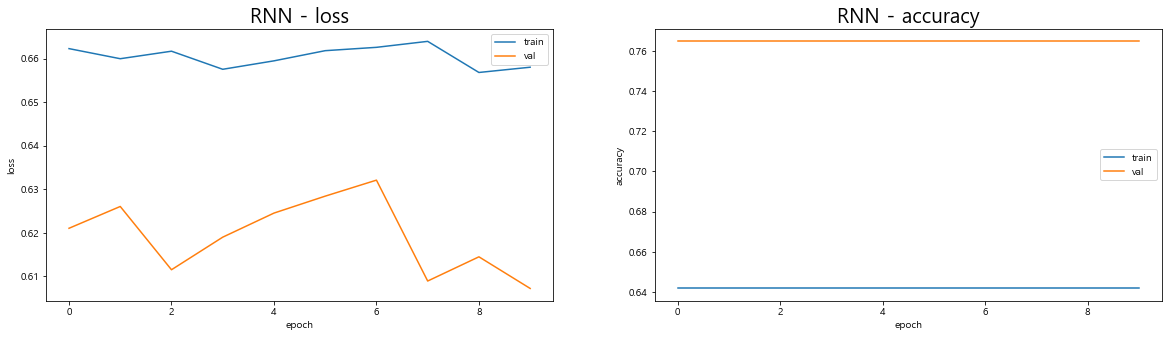

In [106]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()